<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/Predicting_Weight_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv('/content/Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
data[data.duplicated()]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [6]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


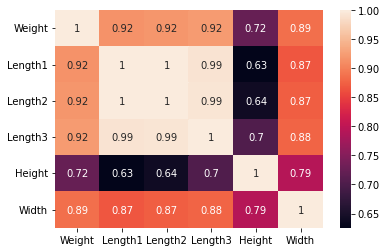

In [9]:
sns.heatmap(data.corr(), annot=True)

In [15]:
model = smf.ols('Weight~Length1+Length2+Length3+Height+Width',data=data).fit()

In [17]:
model.params

Intercept   -499.586955
Length1       62.355214
Length2       -6.526752
Length3      -29.026219
Height        28.297351
Width         22.473307
dtype: float64

In [18]:
model.tvalues

Intercept   -16.893781
Length1       1.550788
Length2      -0.156297
Length3      -1.672696
Height        3.241679
Width         1.103161
dtype: float64

In [19]:
model.pvalues

Intercept    8.441362e-37
Length1      1.230186e-01
Length2      8.760053e-01
Length3      9.643079e-02
Height       1.458477e-03
Width        2.716892e-01
dtype: float64

SIMPLE LINEAR REGRESSION

In [43]:
ml_l1 = smf.ols('Weight~Length1',data=data).fit()
m1_l1r = ml_l1.rsquared
vif1 = 1/(1-m1_l1r)
ml_l1.pvalues

Intercept    2.415227e-30
Length1      4.749620e-64
dtype: float64

In [45]:
ml_l2 = smf.ols('Weight~Length2',data=data).fit()
m1_l2r = ml_l2.rsquared
vif2 = 1/(1-m1_l2r)
ml_l2.pvalues

Intercept    1.295504e-31
Length2      3.395113e-65
dtype: float64

In [46]:
ml_w = smf.ols('Weight~Width',data=data).fit()
m1_wr = ml_w.rsquared
vif3 = 1/(1-m1_wr)
ml_w.pvalues

Intercept    4.163981e-23
Width        2.038195e-54
dtype: float64

In [36]:
ml = smf.ols('Weight~Length1+Length2+Width',data=data).fit()
ml.pvalues

Intercept    2.786091e-37
Length1      7.056459e-01
Length2      3.331999e-01
Width        2.579559e-07
dtype: float64

Since the p-values are sufficiently low, we keep keep all variables

In [47]:
pd.DataFrame({'Variables':['Length1','Length2','Width'], 'VIF':[vif1,vif2,vif3]})

,Variables,VIF
0,Length1,6.193022
1,Length2,6.404446
2,Width,4.670583


The VIF is also sufficiently low

THE TEST FOR NORMALITY OF RESIDUALS

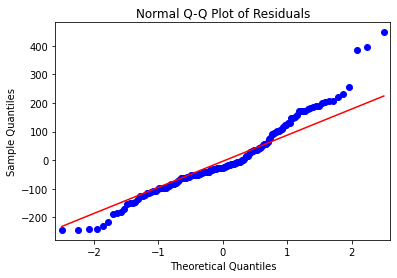

In [49]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [50]:
list(np.where(model.resid>400))

[array([142])]

TEST FOR HOMOSEDACITY OF ERRORS

In [56]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

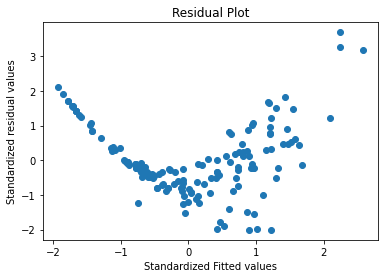

In [58]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

MODEL DETECTION DIAGNOSTICS

DETECTING OUTLIERS

In [61]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([2.07060473e-03, 2.07551042e-03, 4.24926700e-04, 1.91750467e-03,
       1.05689497e-04, 1.29519640e-04, 6.47756856e-06, 2.10546629e-03,
       1.21716976e-03, 9.48674629e-04, 1.13251885e-03, 1.21614564e-03,
       7.76047504e-04, 1.58520775e-02, 7.84511553e-05, 1.76736970e-05,
       2.76716991e-03, 3.53133506e-03, 6.62992089e-04, 1.61299930e-04,
       1.33979560e-03, 8.84181622e-05, 2.51445213e-04, 4.54983453e-04,
       3.58506503e-04, 1.87609158e-03, 3.68334577e-04, 1.12741545e-04,
       6.96341451e-03, 3.03559572e-02, 8.38159416e-03, 1.42457953e-02,
       1.72356492e-03, 3.71857744e-03, 2.04228696e-03, 5.84319454e-03,
       3.35421738e-04, 4.61340724e-07, 6.14634307e-06, 1.13166482e-04,
       3.23083062e-03, 1.19224494e-04, 3.77926880e-05, 5.57150538e-05,
       4.48742747e-04, 1.72712078e-04, 5.82243404e-04, 9.18654012e-04,
       9.44645456e-04, 2.11727822e-03, 1.84007149e-03, 2.79689164e-03,
       3.47842617e-04, 3.00392485e-03, 3.94463790e-03, 2.84580789e-04,
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


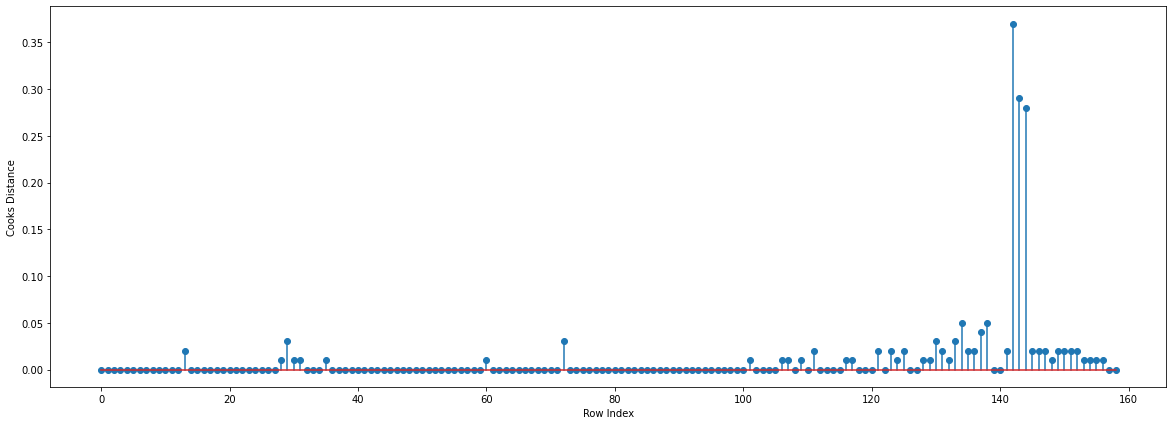

In [63]:
figure = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,2))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
np.argmax(c), np.max(c)

(142, 0.3719833393681138)

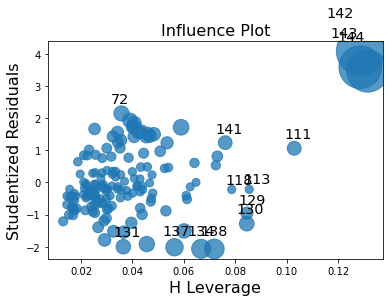

In [66]:
influence_plot(model)
plt.show()

In [67]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.15094339622641512

From the above plots it is evident that the data point 142 is an oulier

In [68]:
data[data.index.isin([142])]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.6,6.144


In [69]:
data = data.drop(data.index[[142]], axis=0)

In [71]:
data.reset_index(inplace=True)

In [72]:
final_model = smf.ols('Weight~Length1+Length2+Length3+Height+Width',data=data).fit()

In [73]:
final_model.rsquared, model.rsquared

(0.8886312228252975, 0.8852867046546207)

In [80]:
pred = final_model.predict(data.iloc[:,2:])

In [81]:
pd.DataFrame({'Actual':data['Weight'],'Predicted':pred})

,Actual,Predicted
0,242.0,328.041830
1,290.0,372.249807
2,340.0,375.155257
3,363.0,434.239900
4,430.0,449.326255
...,...,...
153,12.2,-157.939140
154,13.4,-144.693563
155,12.2,-140.372564
156,19.7,-80.028070
